In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


### why seaborn?
- provides a layer of abstraction hence simpler to use
- less code than matplotlib
- better represent graph
- better aesthetics
- more graphs included
- graph where not in matplotlib
- popular

### Seaborn Roadmap
#### Types of Functions
- Figure Level - container
- Axis Level - plot axis

### Main Classification
- Relational Plot - scatter,line plot
- Distribution Plot - single column plot, histogram,kde plot, rugplot
- Categorical Plot - categorical column, bar, box, count plot, violin, swarmplot
- Regression Plot - linear reg
- Matrix Plot - grid of data pe use, heatmap, cluster map
- Multiplots - joint plot, pairplot

### 1. Relational Plot
- to see the statistical relation between 2 or more variables.
- Bivariate Analysis
-- Plots under this section --

- scatterplot
- lineplot

In [2]:
# scatter
tip = sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


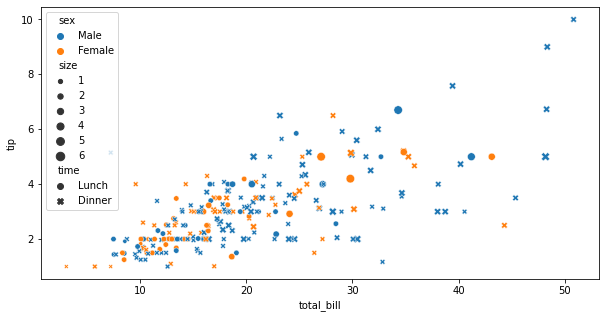

In [3]:
# scatter -- axis level
plt.figure(figsize=(10,5))
sns.scatterplot(data = tip,x='total_bill',y='tip',hue='sex',style='time',size='size')  # label automatically here vs matplt
plt.show()

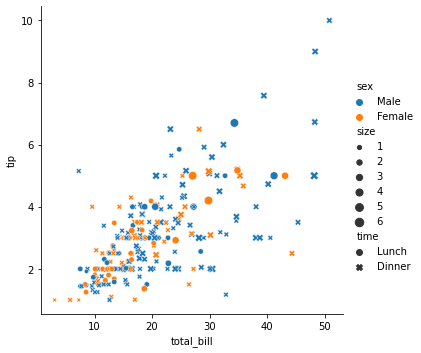

In [4]:
# relplot - figure level , just change kind = 'line', its gives different graph
sns.relplot(data=tip,x='total_bill',y='tip',kind='scatter',hue='sex',style='time',size='size')

### Lineplot- use mostly on timeseries data

In [5]:
gap = px.data.gapminder()
gap

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


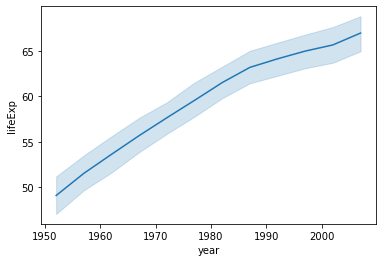

In [6]:
# axis level fun

sns.lineplot(data=gap, x='year',y='lifeExp')
plt.show()

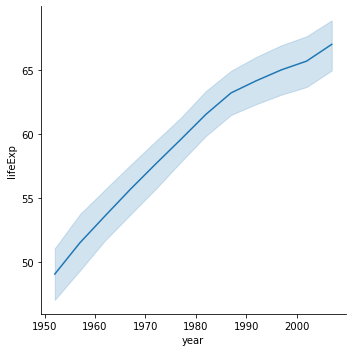

In [7]:
# using relplot

sns.relplot(data=gap, x='year',y='lifeExp',kind='line')

In [8]:
# hue -- style
temp = gap[gap['country'].isin(['India','Brazil','Germany'])]
temp.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
702,India,Asia,1982,56.596,708000000,855.723538,IND,356
564,Germany,Europe,1952,67.500,69145952,7144.114393,DEU,276
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
179,Brazil,Americas,2007,72.390,190010647,9065.800825,BRA,76
568,Germany,Europe,1972,71.000,78717088,18016.180270,DEU,276
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
566,Germany,Europe,1962,70.300,73739117,12902.462910,DEU,276
170,Brazil,Americas,1962,55.665,76039390,3336.585802,BRA,76


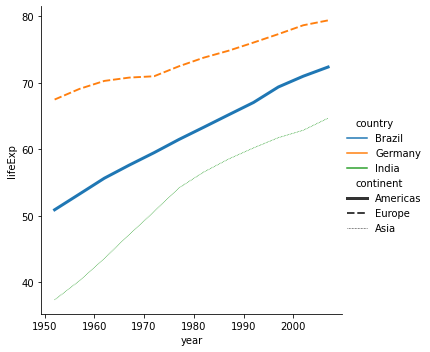

In [9]:
 # figure control whole thats why legend outside the graph
sns.relplot(data = temp, x='year',y='lifeExp',hue='country',kind='line',style='continent',size='continent') 

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

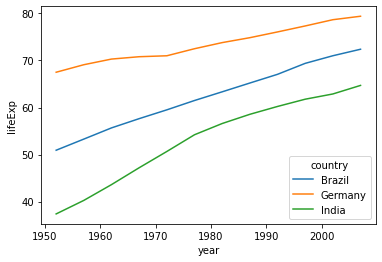

In [10]:
sns.lineplot(data = temp, x='year',y='lifeExp',hue='country')    #here legend inside the graph because axis control

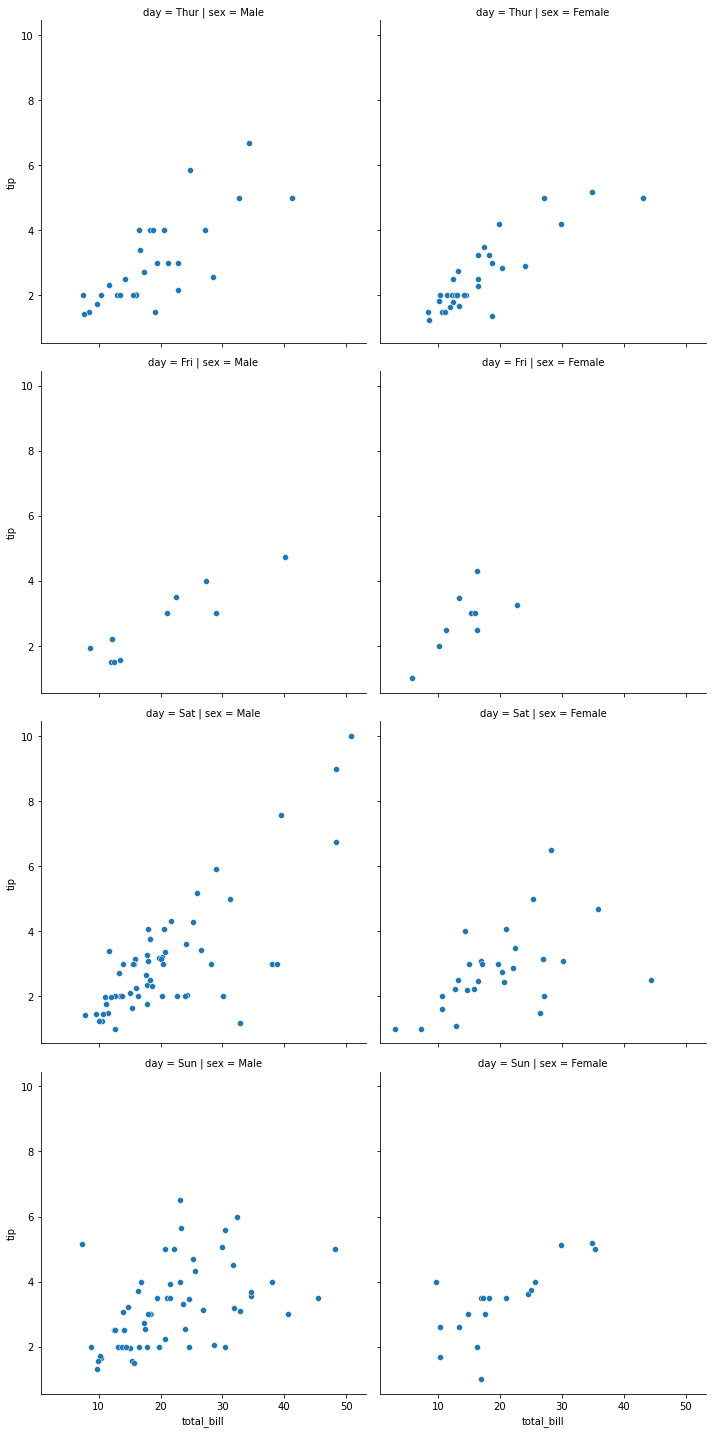

In [11]:
# facet plot--figure level func--work with relplot
# it will not work with scatter plot function and line plot function 
# because of this is figure level function
sns.relplot(data=tip,x='total_bill',y='tip',kind='scatter',col='sex',row='day')  

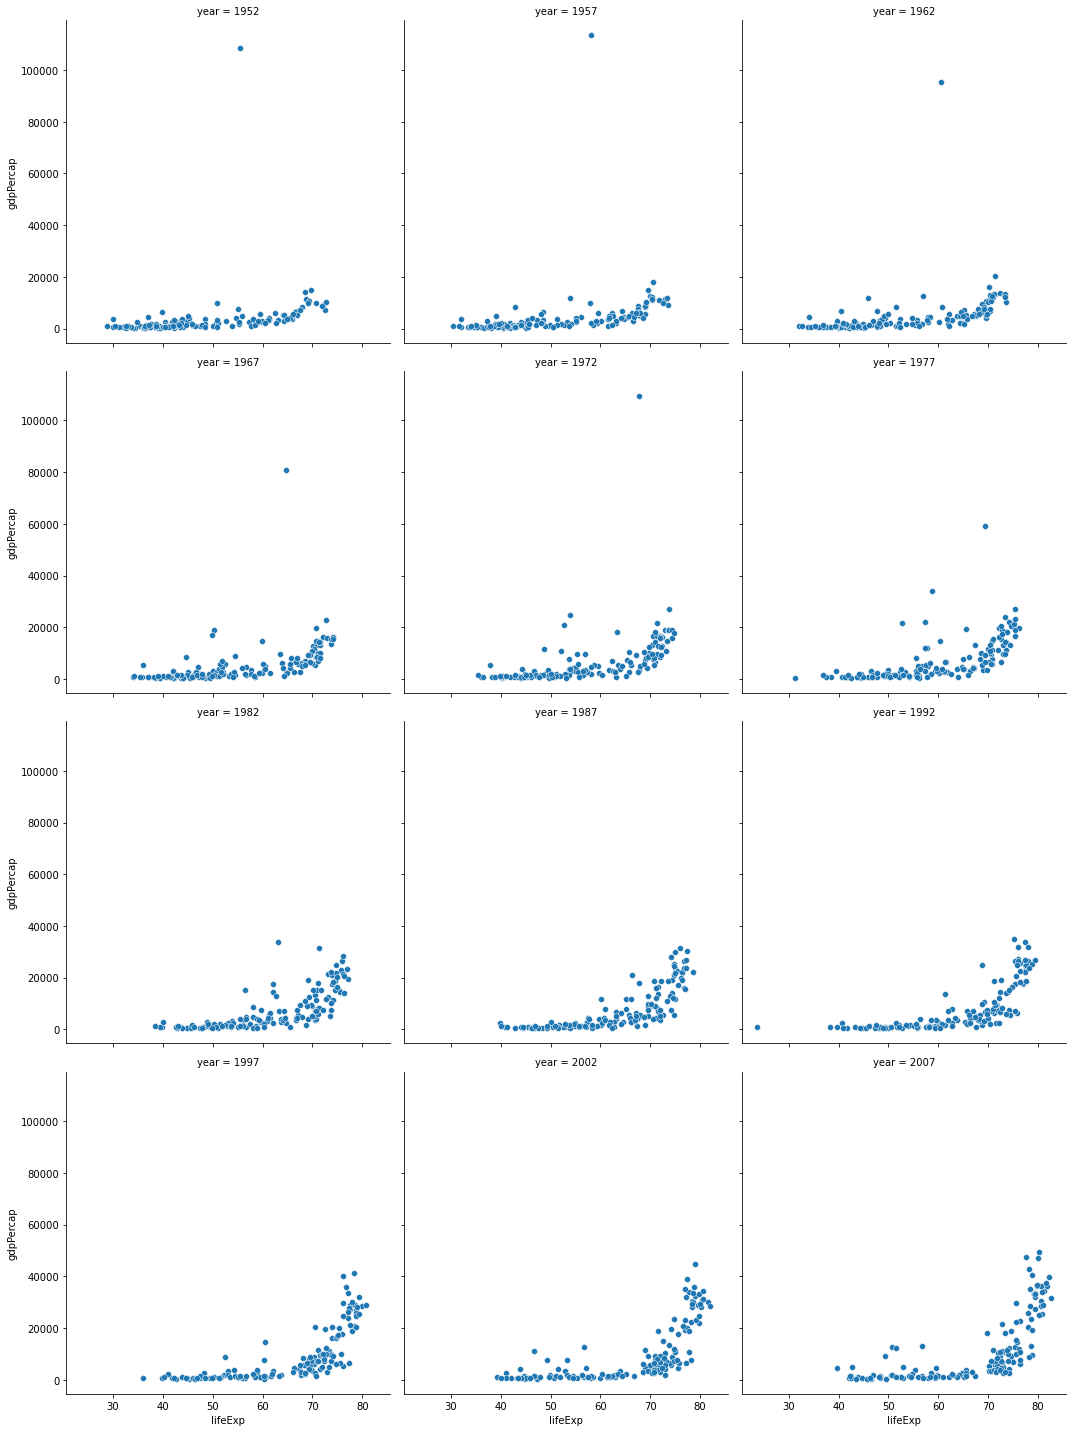

In [12]:
# col wrap
# col_wrap - when u have multiple category ex.in col='year' so all the graph plot in one line, so that why col_wrap=3 means 
# per column 3 graph and other plot down row
sns.relplot(data = gap, x='lifeExp', y='gdpPercap', kind='scatter',col='year',col_wrap=3) 

### 2. Distribution Plots
- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?
### Plots under distribution plot

- histplot
- kdeplot
- rugplot


In [13]:
# figure level fun - displot
# axis level fun - histplot, kdeplot,rugplot

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

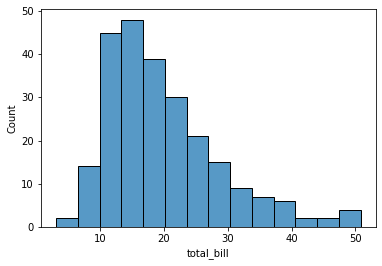

In [14]:
# plotiing univariate histogram
sns.histplot(data=tip,x='total_bill')

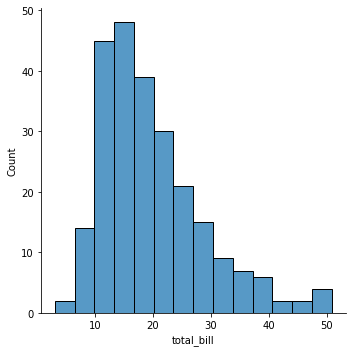

In [15]:
# using figure level - displot
sns.displot(data=tip,x='total_bill',kind='hist')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

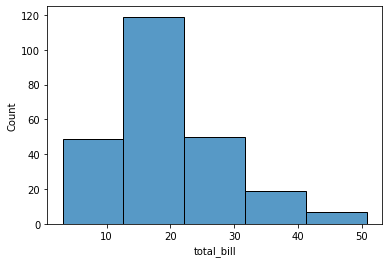

In [16]:
# bins parameter
sns.histplot(data=tip,x='total_bill',bins=5)

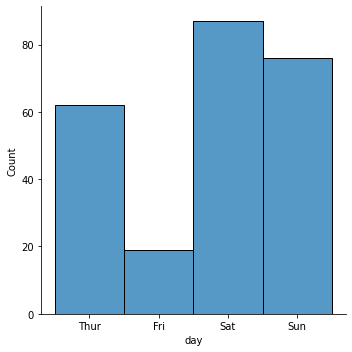

In [17]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables
# category count - but not a conventional hist
sns.displot(data=tip,x='day',kind='hist')

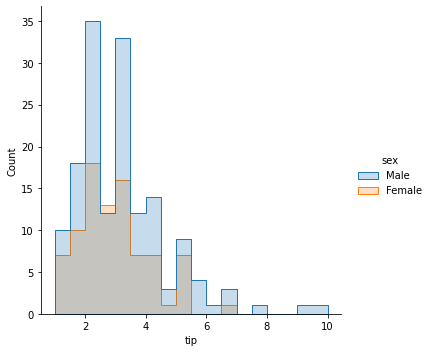

In [18]:
# hue parameter
sns.displot(data=tip,x='tip',kind='hist',hue='sex',element='step')

In [19]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


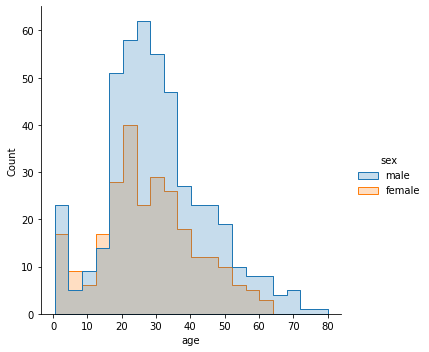

In [20]:
sns.displot(data=titanic,x='age',kind='hist',element='step',hue='sex')

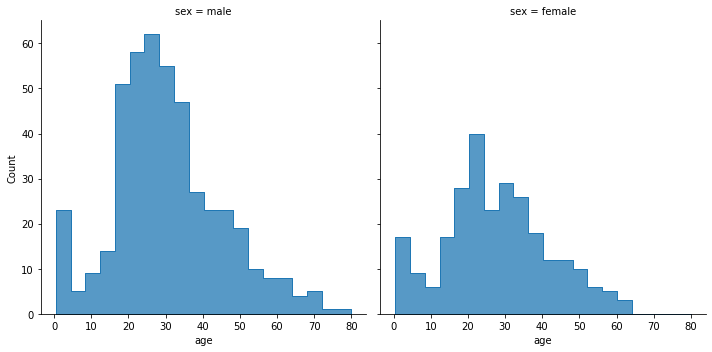

In [21]:
# faceting using col and row --> not work with hist plt means axis level
sns.displot(data=titanic,x='age',kind='hist',element='step',col='sex')

### kde plot - kernal density estimate

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

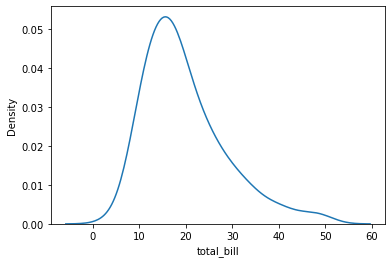

In [22]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel,
# producing a continuous density estimate

sns.kdeplot(data=tip,x='total_bill')

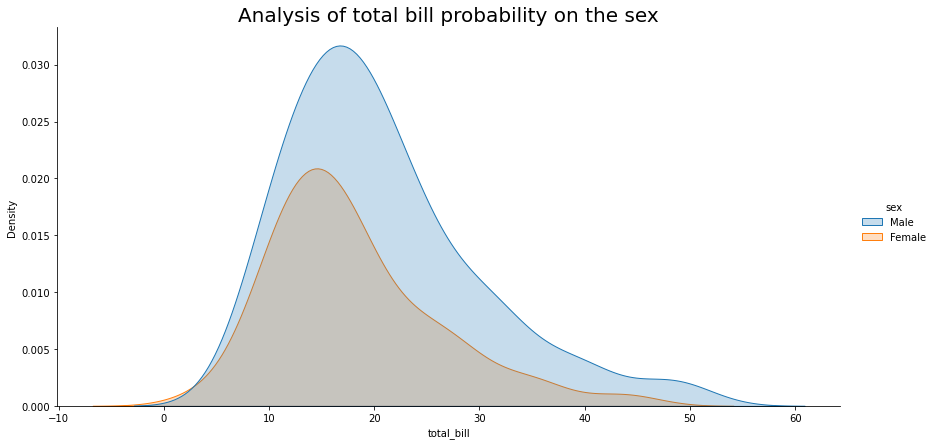

In [23]:
# using figure level
# hue and fill
# figure level figure size increase by height and aspect
sns.displot(data=tip,x='total_bill',kind='kde',hue='sex',fill=True,height=6,aspect=2,)
plt.title('Analysis of total bill probability on the sex',size=20)
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

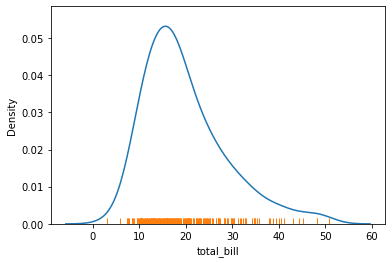

In [24]:
# Rugplot
# Plot marginal distributions by drawing ticks along the x and y axes.
# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tip,x='total_bill')
sns.rugplot(data=tip,x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

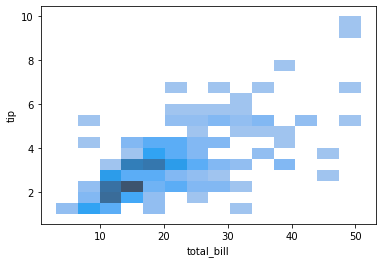

In [25]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

sns.histplot(data=tip, x='total_bill', y='tip')
#sns.displot(data=tips, x='total_bill', y='tip',kind='hist')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

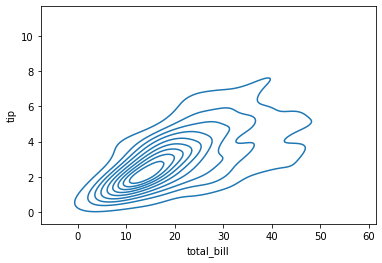

In [26]:
# Bivariate kdeplot
# a bivariate KDE plot smoothes the(x,y) observations with a 2d Gaussian

sns.kdeplot(data=tip,x='total_bill',y='tip')

## Matrix Plot
- Heatmap
- clustermap

<AxesSubplot:xlabel='year', ylabel='country'>

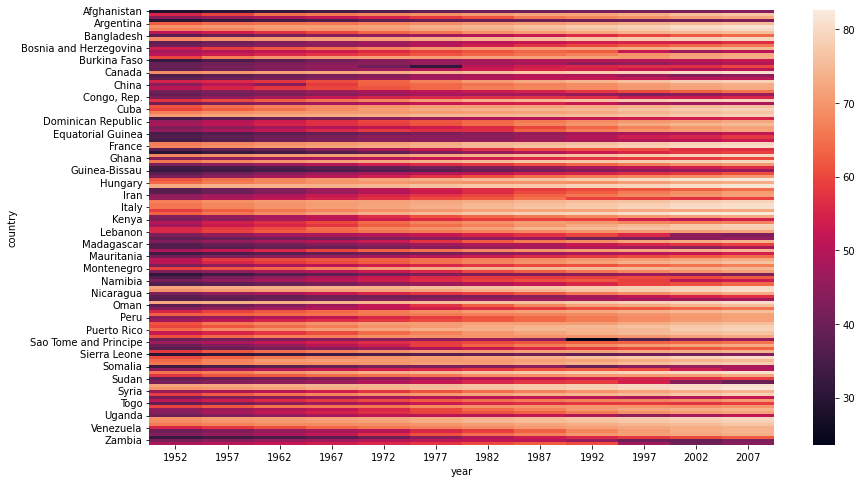

In [27]:
# heatmap
# plot rectangular data as a color-encoded matrix
temp_1 = gap.pivot(index='country',columns='year',values='lifeExp')

# axes level 
plt.figure(figsize=(14,8))
sns.heatmap(temp_1)

<AxesSubplot:xlabel='year', ylabel='country'>

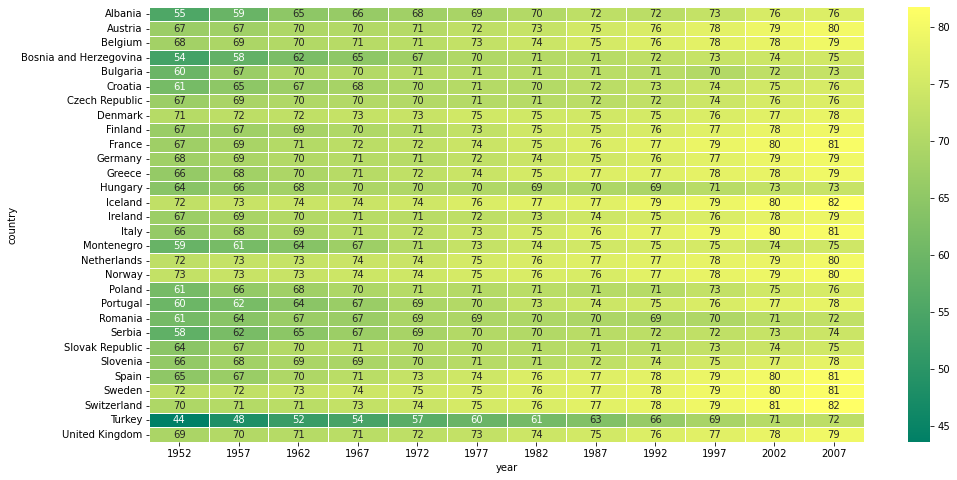

In [28]:
# annot--cmap--linewidth
plt.figure(figsize=(16,8))
temp_2 =gap[gap['continent']=='Europe'].pivot(index='country',columns='year',values='lifeExp')
sns.heatmap(temp_2,annot=True,linewidth=0.5,cmap='summer')

In [29]:
# clustermap
# plot a matrix 
iris = px.data.iris()

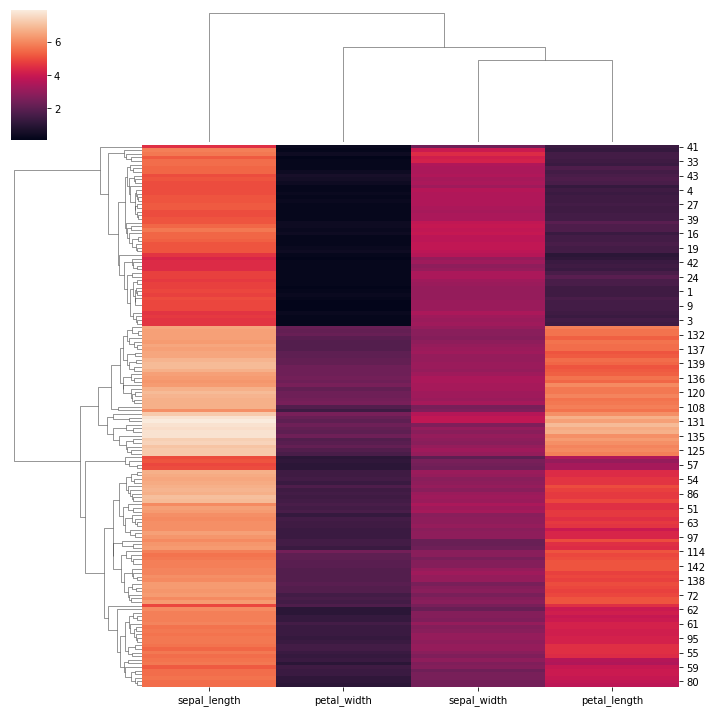

In [30]:
# cluster-- hierarchal clustering 
# those similar columns close to each other and dissimilars are long
# also this aplied on rows - changing rows order and column order and arange such way to close similar data
sns.clustermap(iris.iloc[:,[0,1,2,3]])

## Categorical Plots
### Categorical Scatter Plot
- Stripplot
- Swarmplot
### Categorical Distribution Plots
- Boxplot
- Violinplot
### Categorical Estimate Plot -> for central tendency
- Barplot
- Pointplot
- Countplot
- Figure level function -> catplot


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

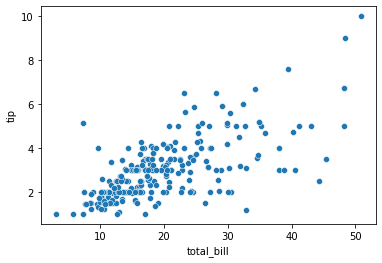

In [31]:
sns.scatterplot(data = tip,x ='total_bill',y='tip')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

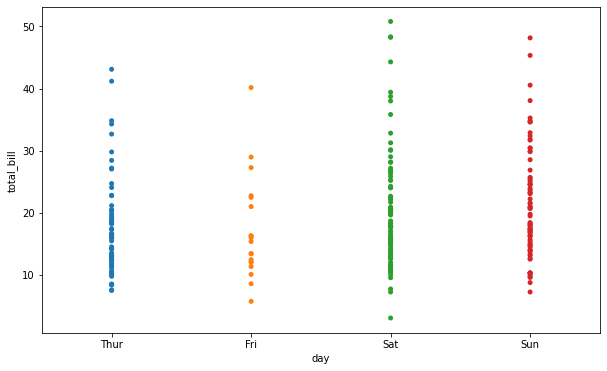

In [32]:
# strip plot - one category and one numerical column
# axis level
plt.figure(figsize=(10,6))
sns.stripplot(data=tip,x='day',y='total_bill',jitter=False)   # jitter for single line values upword not spred

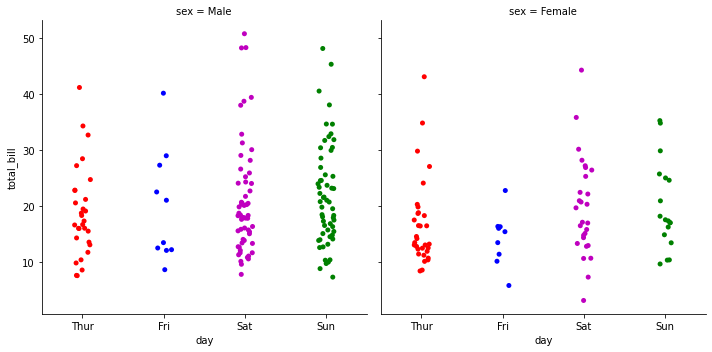

In [57]:
# using catplot -- figure level
sns.catplot(data=tip,x='day',y='total_bill',kind='strip',palette=['r','b','m','g'],col='sex')

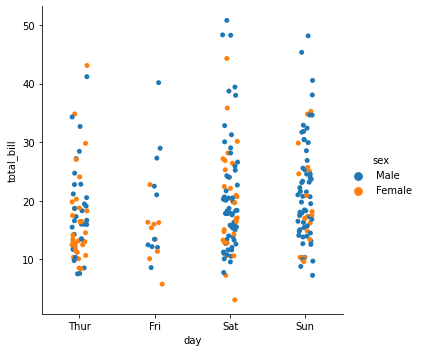

In [34]:
#using jitter
# hue
sns.catplot(data=tip,x='day',y='total_bill',kind='strip',jitter=0.1, hue='sex')

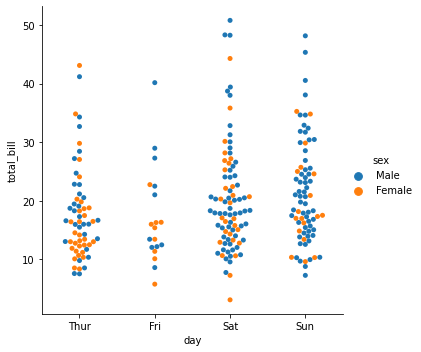

In [60]:
# swarplot - both are scatter , better represent for distrubution - some algorithm are aply, for better on small data
sns.catplot(data=tip,x='day',y='total_bill',kind='swarm', hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

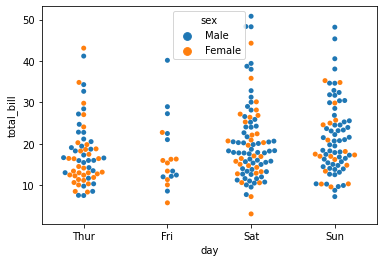

In [63]:
# using axis
sns.swarmplot(data=tip,x='day',y='total_bill', hue='sex')

In [37]:
## categorical distribution plots - using single column

### Boxplot
- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

image.png

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

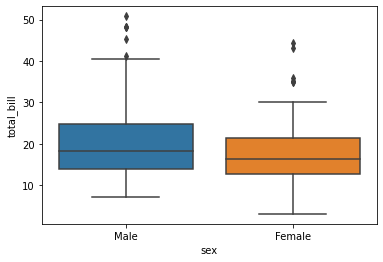

In [38]:
# using axis level
sns.boxplot(data=tip,x='sex',y='total_bill')

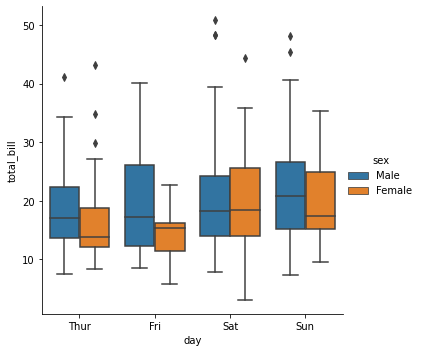

In [39]:
# using figure level
sns.catplot(kind='box',x='day',y='total_bill',data=tip,hue='sex')

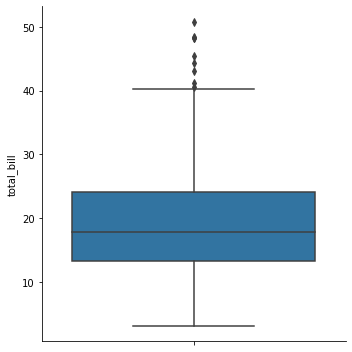

In [40]:
sns.catplot(kind='box',y='total_bill',data=tip)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

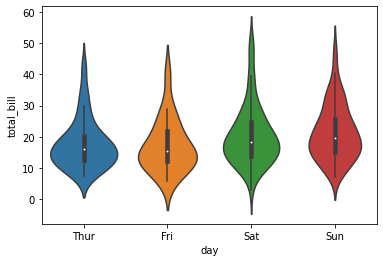

In [41]:
# Violent plot = boxplot + kdeplot
# its use for side by side analysis
sns.violinplot(data=tip,x='day',y='total_bill')

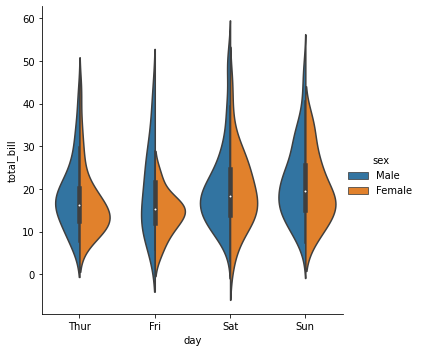

In [42]:
sns.catplot(kind='violin',x='day',y='total_bill',data=tip,hue='sex',split=True)

### categorical estimate plot

In [43]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

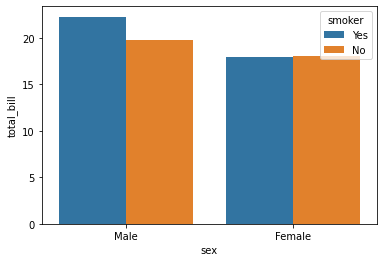

In [44]:
# barplot
sns.barplot(data=tip,x='sex',y='total_bill',hue='smoker',ci=None)  #estimetor = for agg function ,ci=none means remove errorbar

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

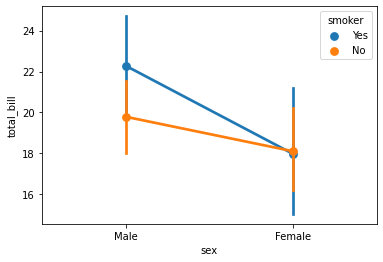

In [45]:
# point plot - connect errorbar
sns.pointplot(data=tip,x='sex',y='total_bill',hue='smoker')

### countplot
-A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

<AxesSubplot:xlabel='sex', ylabel='count'>

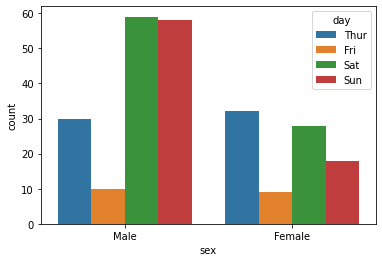

In [66]:
sns.countplot(data=tip,x='sex',hue='day')

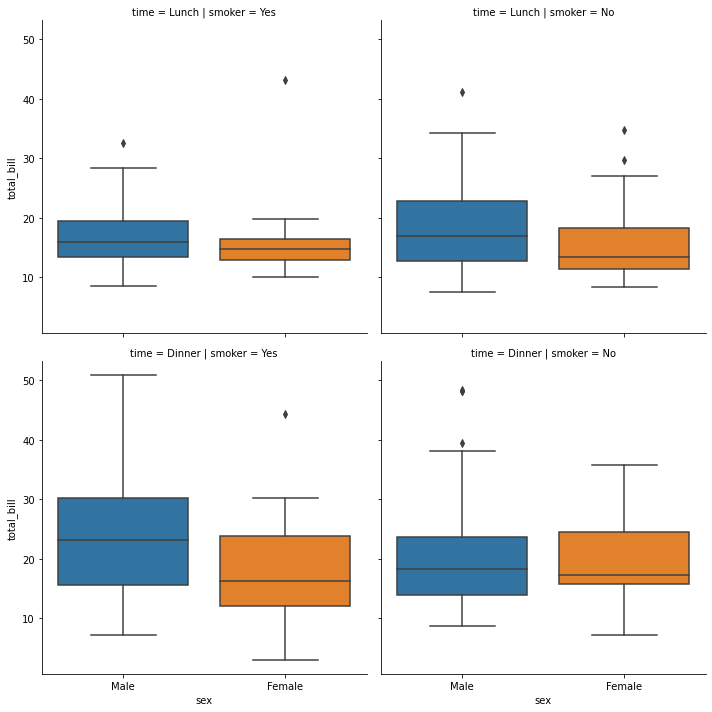

In [47]:
# faciting
sns.catplot(data=tip,x='sex',y='total_bill',col='smoker',kind='box',row='time',)

## Reg plot - regression plot

- regplot
- lmplot
- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

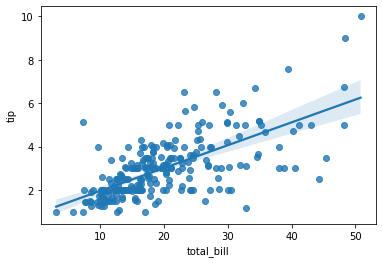

In [48]:
# regplot - axis level
sns.regplot(data=tip,x='total_bill',y='tip')

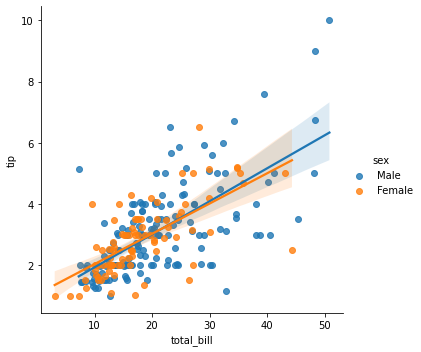

In [49]:
# implot - figure level
sns.lmplot(data=tip,x='total_bill',y='tip',hue='sex')  # hue paramter only work with lmplot not with reg

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

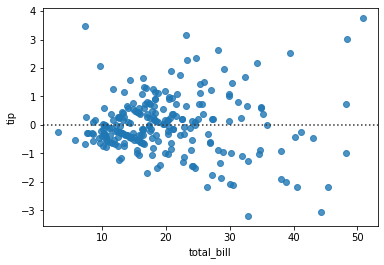

In [50]:
# residplot - error means diff of original data and predict data
sns.residplot(data=tip,x='total_bill',y='tip')

### multigrid plot
- facetgrid
- joint grid
- pairgrid

In [67]:
# facet grid --> figure level -- relplot,displot,catplot-- using col and row

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


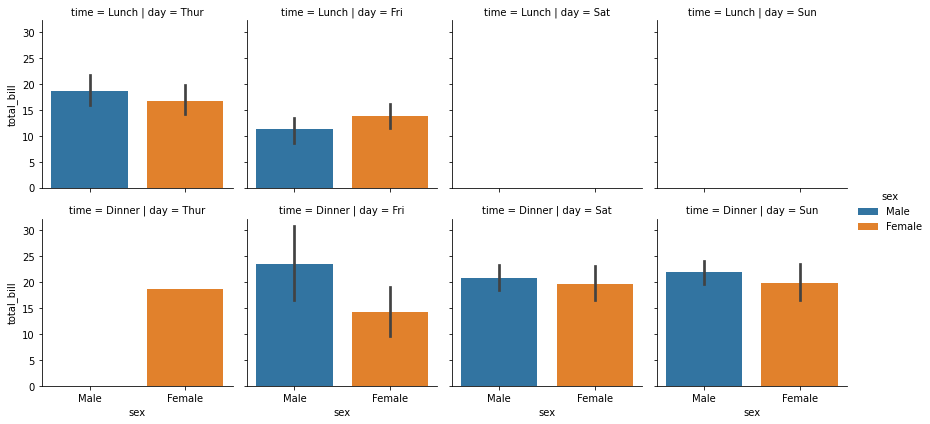

In [76]:
# second way to plot facetplot, using facetgrid
g = sns.FacetGrid(data=tip,col='day',row='time',hue='sex')
g.map(sns.barplot,'sex','total_bill')
g.add_legend()
# g.set_titles('Average total bills on sex with every day on time')

### ploting pairwise relationship (PairGrid vs Pairplot)

In [78]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


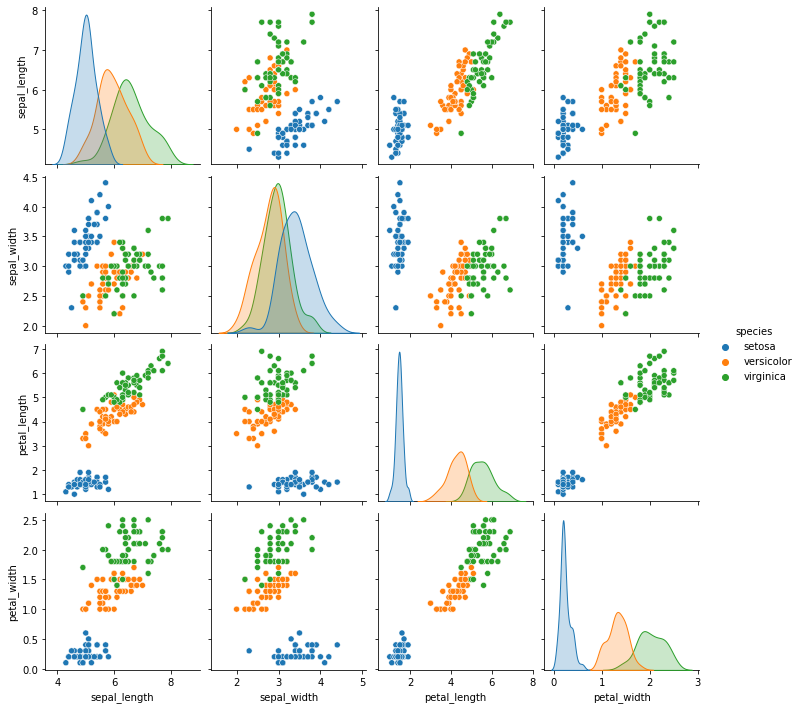

In [81]:
# pairplot
sns.pairplot(iris.iloc[:,:-1],hue='species')

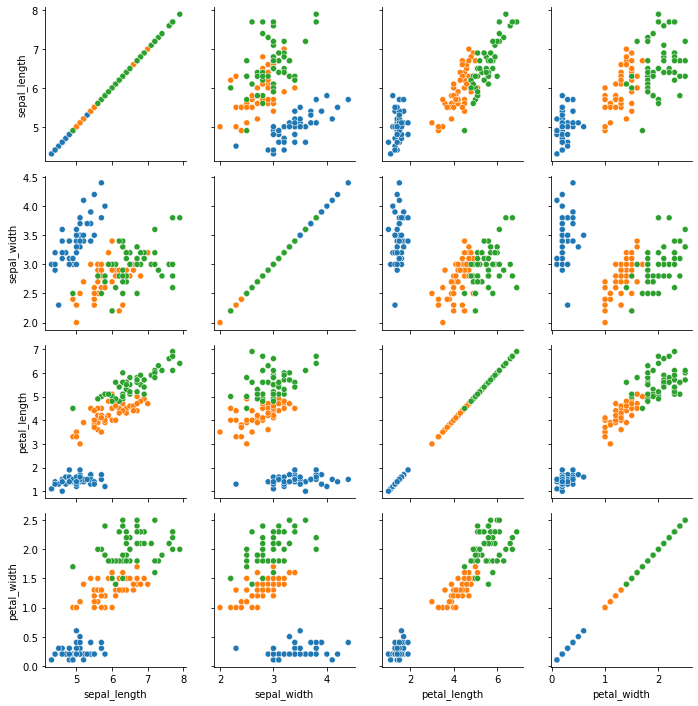

In [87]:
# pairgrid
g = sns.PairGrid(data=iris.iloc[:,:-1],hue='species')
g.map(sns.scatterplot)

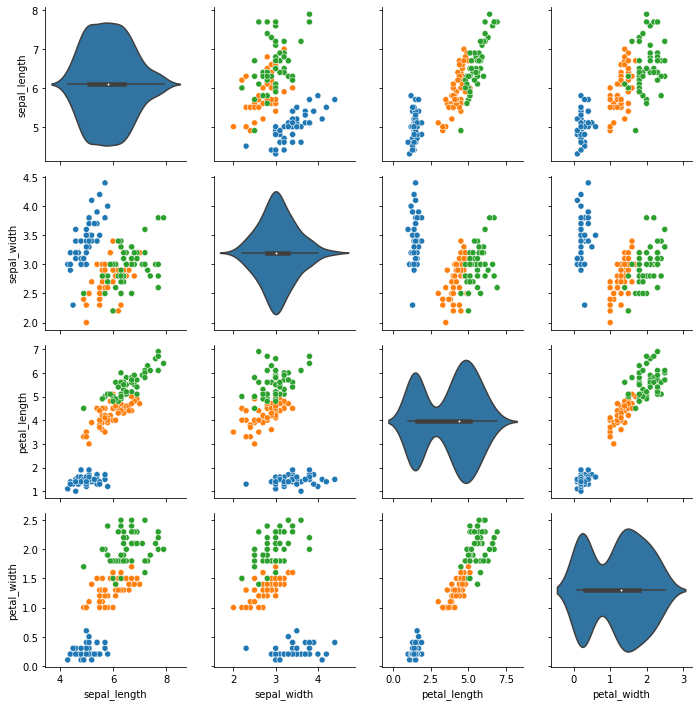

In [89]:
# map_diag --> use for diagonal plot ploting
# map_offdiag --> use for offdigonal plots ploting

g = sns.PairGrid(data=iris.iloc[:,:-1],hue='species')
g.map_diag(sns.violinplot)
g.map_offdiag(sns.scatterplot)

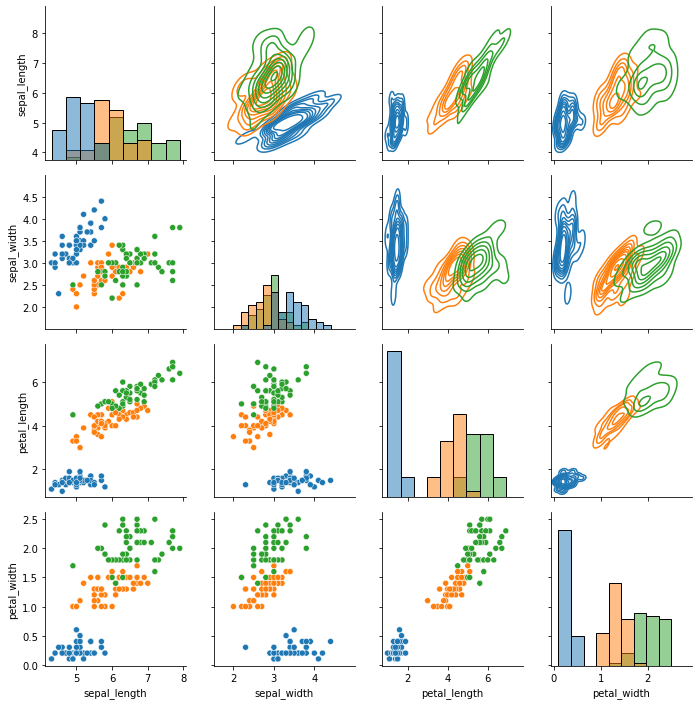

In [90]:
# map_diag -- map_upper --map_lower
g = sns.PairGrid(data=iris.iloc[:,:-1],hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)               # benefit of grid plots are for different graph plots
g.map_lower(sns.scatterplot)

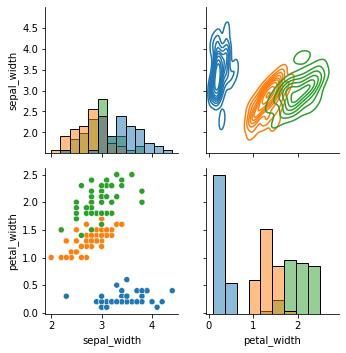

In [91]:
# var parameter for selecting column for plots
g = sns.PairGrid(data=iris.iloc[:,:-1],hue='species',vars=['sepal_width','petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)


### Joint plot vs JointGrid

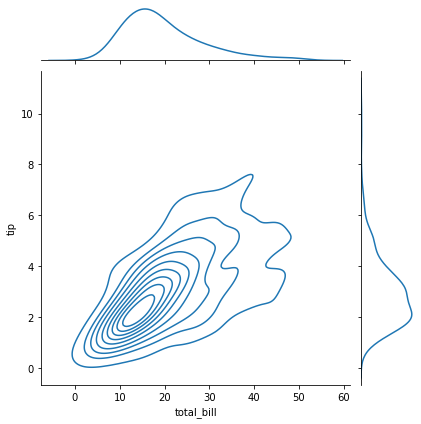

In [94]:
# join plot

sns.jointplot(data=tip,x='total_bill',y='tip',kind='kde')

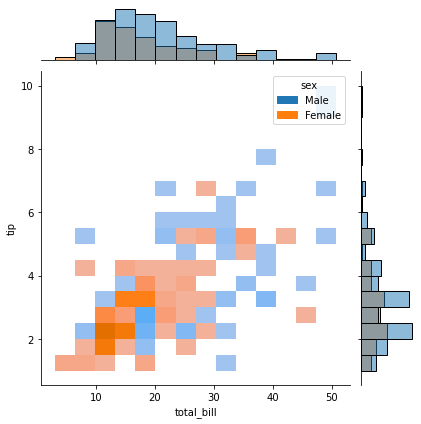

In [98]:
sns.jointplot(data=tip,x='total_bill',y='tip',kind='hist',hue='sex')

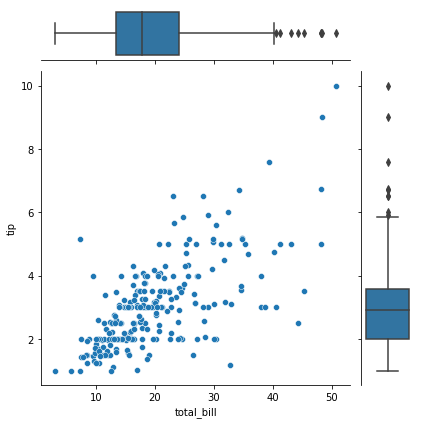

In [103]:
g = sns.JointGrid(data=tip,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.boxplot)          # benefit of grid plots are for different graph plots

###  utility function

In [104]:
# datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [105]:
# load datsets
sns.load_dataset('taxis')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [1]:
import random

In [3]:
count = 6
comp = random.randint(1,100)

while True:
    try:
        mychoise = int(input('enter number: '))
        if comp>mychoise:
            print('choose biger number')
        elif comp<mychoise:
            print('choose small number')
        elif count==0:
            break
        else:
            print("computer choose",comp)
            print("your choice",mychoise)
            print('correct')
            break
    except:
        print('choose numbers only')
    count = count-1
    print("count remaining",count)

enter number: 70
choose small number
count remaining 5
enter number: 40
choose biger number
count remaining 4
enter number: 55
computer choose 55
your choice 55
correct
